## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Na koniec należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np


url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'
fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

**1** Wczytaj obraz jet.bmp i wylicz jego histogram

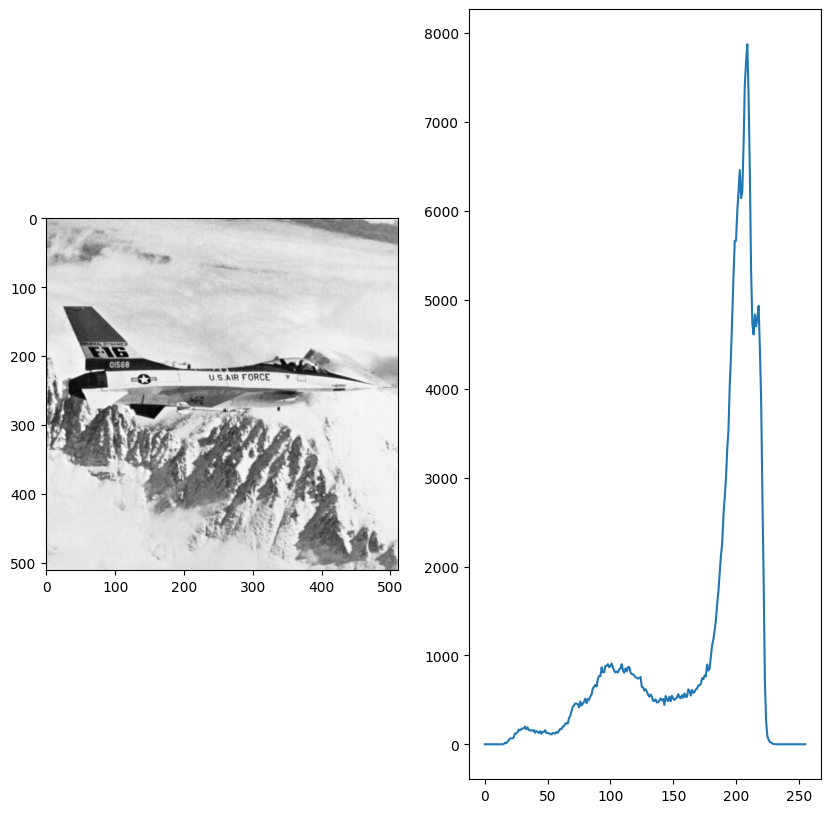

In [2]:
jet = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([jet], [0], None, [256], [0,256])
hist_cum = np.cumsum(hist)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(jet, cmap='gray')
plt.subplot(1,2,2)
plt.plot(hist)
plt.show()

2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (lm).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany. Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego. W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli. Następnie znaleźć minimum - np.argmin.

In [3]:
# Jasność z histogramu = (liczba słupków * wysokość słupka) / (szerokość obrazu * wysokość obrazu)

brightness = np.dot(np.arange(256), hist) / (jet.shape[0] * jet.shape[1])
brightness = int(np.floor(brightness))
print(brightness)


178


<ipython-input-3-d8f3acec4644>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  brightness = int(np.floor(brightness))


Funkcja np.dot() w bibliotece NumPy wykonuje iloczyn skalarny (mnożenie macierzowe) dwóch tablic.

4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy H1 i H2. Dla każdego z nich wyliczyć histogram skumulowany ( C1  i  C2 ) i wykonać normalizację. Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.

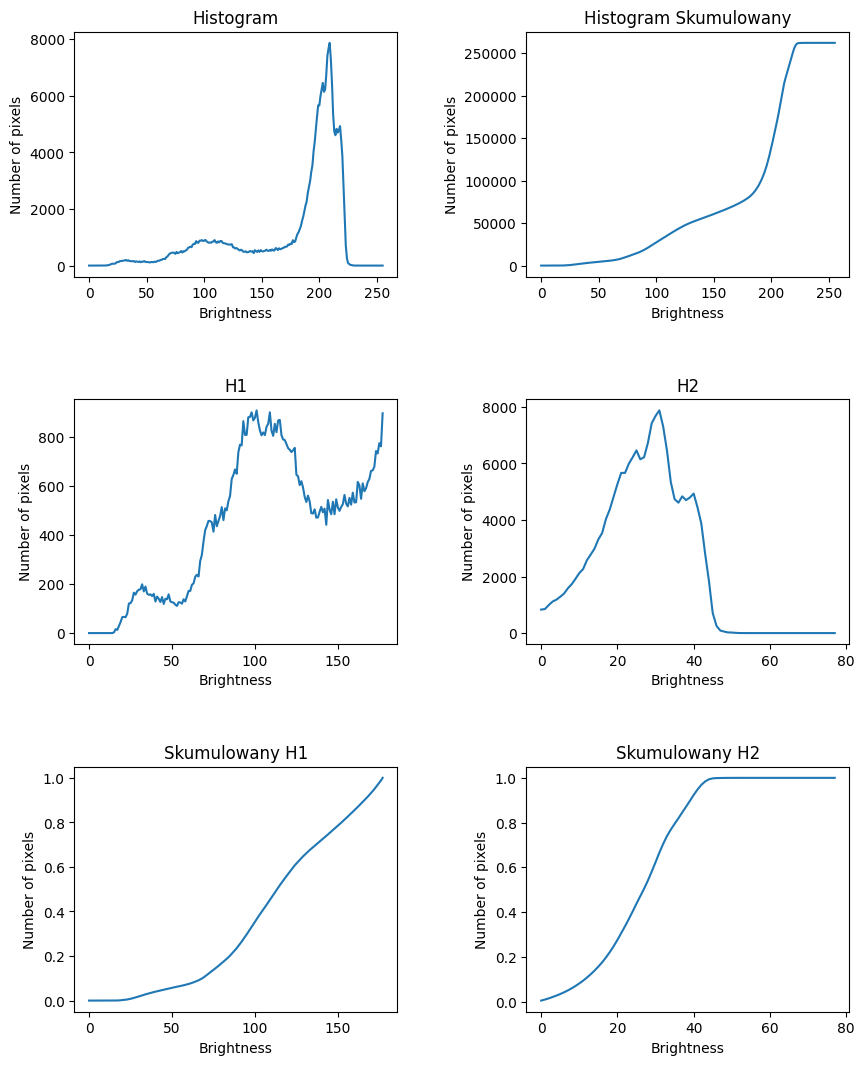

In [4]:
H1 = hist[:brightness]
H2 = hist[brightness:]
# Obliczenie skumulowanych histogramów dla H1 i H2
H1_cum = np.cumsum(H1) #C1
H2_cum = np.cumsum(H2) #C2

#Normalizacja
H1_cum = H1_cum / H1_cum.max()
H2_cum = H2_cum / H2_cum.max()

fig, axs = plt.subplots(3, 2, figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

# Pierwszy wykres: histogram
axs[0, 0].plot(hist)
axs[0, 0].set_title("Histogram")
axs[0, 0].set_xlabel("Brightness")
axs[0, 0].set_ylabel("Number of pixels")

# Drugi wykres: kumulatywny histogram
axs[0, 1].plot(hist_cum)
axs[0, 1].set_title("Histogram Skumulowany")
axs[0, 1].set_xlabel("Brightness")
axs[0, 1].set_ylabel("Number of pixels")

# Trzeci wykres: lewy histogram
axs[1, 0].plot(H1)
axs[1, 0].set_title("H1")
axs[1, 0].set_xlabel("Brightness")
axs[1, 0].set_ylabel("Number of pixels")

# Czwarty wykres: prawy histogram
axs[1, 1].plot(H2)
axs[1, 1].set_title("H2")
axs[1, 1].set_xlabel("Brightness")
axs[1, 1].set_ylabel("Number of pixels")

# Piąty wykres: kumulatywny lewy histogram
axs[2, 0].plot(H1_cum)
axs[2, 0].set_title("Skumulowany H1")
axs[2, 0].set_xlabel("Brightness")
axs[2, 0].set_ylabel("Number of pixels")

# Szósty wykres: kumulatywny prawy histogram
axs[2, 1].plot(H2_cum)
axs[2, 1].set_title("Skumulowany H2")
axs[2, 1].set_xlabel("Brightness")
axs[2, 1].set_ylabel("Number of pixels")

# Wyświetlenie wykresów
plt.show()

5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT. Należy tak przeskalować  C1  i  C2 , aby uzyskać jednorodne przekształcenie. Tablicę  C1  wystarczy pomnożyć przez próg podziału. Tablicę  C2  należy przeskalować do przedziału:  <lm+1;255> , gdzie  lm  jest progiem podziału.
C1n=(lm)∗C1;
C2n=lm+1+(255−lm−1)∗C2;

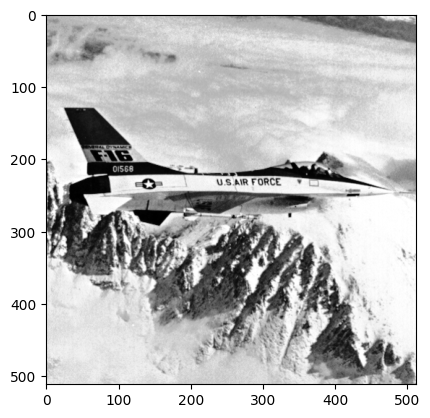

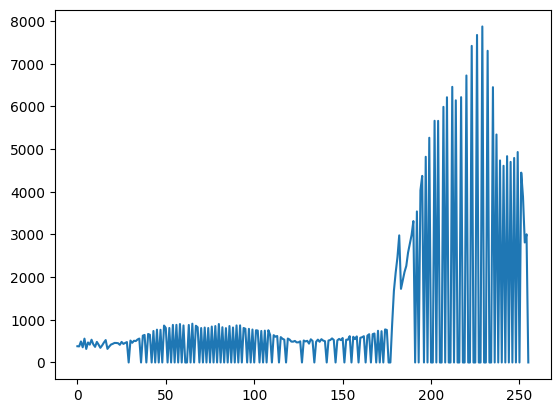

In [5]:
H1_cum = H1_cum * brightness # hist_cum[brightness] - próg przedziału
H2_cum = brightness + 1 + (255 - brightness - 1) * H2_cum
jet_hist_cum = np.concatenate((H1_cum, H2_cum))

jet_lut = cv2.LUT(jet, jet_hist_cum)


plt.imshow(jet_lut, cmap='gray')
plt.show()
plt.plot(cv2.calcHist([jet_lut], [0], None, [256], [0,256]))
plt.show()